Author: <font color="blue">Miguel Rando Ramirez</font>

E-mail: <font color="blue">miguel.rando01@estudiant.upf.edu</font>

Date: <font color="blue">01/12/2024</font>

In [86]:
import io
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# 1. Dataset

In [45]:
# LEAVE AS-IS

INPUT_FILE = "aemet-barcelona-airport-2016-2024.json"
weather = pd.read_json(INPUT_FILE)

weather.head(5)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,sol,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2016-07-01,0201D,BARCELONA,BARCELONA,6,"24,1","0,0","21,9",03:40,"26,3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,0201D,BARCELONA,BARCELONA,6,"24,6","0,0","22,3",04:40,"27,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,0201D,BARCELONA,BARCELONA,6,"23,4","0,0","21,9",11:00,"24,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,0201D,BARCELONA,BARCELONA,6,"23,8","0,0","21,8",04:40,"25,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,0201D,BARCELONA,BARCELONA,6,"25,3","0,0","23,2",00:10,"27,4",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# LEAVE AS-IS

COLUMN_NAMES = {
  "fecha" : "date",
  "indicativo" : "station_num",
  "nombre" : "station_name",
  "provincia" : "station_province",
  "altitud" : "station_altitude",
  "tmed" : "temp_avg",
  "tmin" : "temp_min",
  "tmax" : "temp_max",
  "horatmin" : "time_temp_min",
  "horatmax" : "time_temp_max",
  "prec" : "rainfall",
  "dir" : "windspeed_dir",
  "velmedia" : "windspeed_avg",
  "racha" : "windspeed_gusts",
  "horaracha" : "time_windspeed_gusts",
  "sol" : "sun",
  "presMax" : "pressure_max",
  "horaPresMax" : "time_pressure_max",
  "presMin" : "pressure_min",
  "horaPresMin" : "time_pressure_min"
}

<font size="+1" color="red">Replace this cell with your code to rename column names, and print the first 5 rows of the data</font>

In [47]:
weather.rename(columns=COLUMN_NAMES, inplace=True)

print(weather.head(5))

         date station_num station_name station_province  station_altitude  \
0  2016-07-01       0201D    BARCELONA        BARCELONA                 6   
1  2016-07-02       0201D    BARCELONA        BARCELONA                 6   
2  2016-07-03       0201D    BARCELONA        BARCELONA                 6   
3  2016-07-04       0201D    BARCELONA        BARCELONA                 6   
4  2016-07-05       0201D    BARCELONA        BARCELONA                 6   

  temp_avg rainfall temp_min time_temp_min temp_max  ...  sun  pressure_max  \
0     24,1      0,0     21,9         03:40     26,3  ...  NaN           NaN   
1     24,6      0,0     22,3         04:40     27,0  ...  NaN           NaN   
2     23,4      0,0     21,9         11:00     24,9  ...  NaN           NaN   
3     23,8      0,0     21,8         04:40     25,9  ...  NaN           NaN   
4     25,3      0,0     23,2         00:10     27,4  ...  NaN           NaN   

  time_pressure_max pressure_min time_pressure_min hrMedia hrM

<font size="+1" color="red">Replace this cell with your code to drop the station_num, station_name, station_province, station_altitude, and time_* columns, which we will not use, and print the first 10 rows of the data</font>

In [48]:
columns_to_drop = [
    "station_num", 
    "station_name", 
    "station_province", 
    "station_altitude",
    "time_temp_min", 
    "time_temp_max", 
    "time_windspeed_gusts", 
    "time_pressure_max", 
    "time_pressure_min"
]

weather.drop(columns = columns_to_drop, inplace = True)

print(weather.head(5))

         date temp_avg rainfall temp_min temp_max  windspeed_dir  \
0  2016-07-01     24,1      0,0     21,9     26,3           99.0   
1  2016-07-02     24,6      0,0     22,3     27,0           13.0   
2  2016-07-03     23,4      0,0     21,9     24,9           20.0   
3  2016-07-04     23,8      0,0     21,8     25,9           25.0   
4  2016-07-05     25,3      0,0     23,2     27,4           35.0   

  windspeed_avg windspeed_gusts  sun pressure_max pressure_min  hrMedia  \
0           3,1             5,8  NaN          NaN          NaN      NaN   
1           3,6             7,5  NaN          NaN          NaN      NaN   
2           4,2             8,9  NaN          NaN          NaN      NaN   
3           3,3             6,7  NaN          NaN          NaN      NaN   
4           3,1             6,4  NaN          NaN          NaN      NaN   

   hrMax horaHrMax  hrMin horaHrMin  
0    NaN       NaN    NaN       NaN  
1    NaN       NaN    NaN       NaN  
2    NaN       NaN    NaN 

<font size="+1" color="red">Replace this cell with your code implementing *str_commas_to_float*.</font>

In [49]:
def str_commas_to_float(text):
    
    #we check if it is a string
    if isinstance(text, str):
        if text == "Ip":
            return 0.0
        try:
            return float(text.replace(",", "."))
        except ValueError:
            return np.nan
    return np.nan

<font size="+1" color="red">Replace this cell with your code testing *str_commas_to_float*.</font>

In [50]:
# Test cases
assert np.isnan(str_commas_to_float("")), "Empty string should return NaN"
assert np.isnan(str_commas_to_float("Varias")), "String 'Varias' should return NaN"
assert np.isnan(str_commas_to_float("06:30")), "String '06:30' should return NaN"

assert str_commas_to_float("0,0") == 0.0, "'0,0' should return 0.0"
assert str_commas_to_float("Ip") == 0.0, "'Ip' should return 0.0"

assert str_commas_to_float("13,5") == 13.5, "'13,5' should return 13.5"
assert str_commas_to_float("13") == 13.0, "'13' should return 13.0"

print("All test cases passed!")

All test cases passed!


<font size="+1" color="red">Replace this cell with your code applying the above function to the specified columns.</font>

In [51]:
columns_to_convert = [
    'temp_min', 'temp_max', 'temp_avg', 'rainfall', 
    'windspeed_dir', 'windspeed_avg', 'windspeed_gusts', 
    'sun', 'pressure_min', 'pressure_max'
]

for c in columns_to_convert:
    weather[c] = weather[c].apply(str_commas_to_float)

In [52]:
# LEAVE AS-IS

weather.set_index('date', inplace=True)
weather.index = pd.to_datetime(weather.index)
weather.head(3)

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
date,,,,,,,,,,,,,,,
2016-07-01,24.1,0.0,21.9,26.3,NaN,3.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,24.6,0.0,22.3,27.0,NaN,3.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,23.4,0.0,21.9,24.9,NaN,4.2,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# LEAVE AS-IS

# Configure font sizes
plt.rc('font', size=10) 
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)

In [54]:
# LEAVE AS-IS

# Plot function
def plot(df, column, xlabel='Date', ylabel=''):
    
    # Create a figure
    plt.figure(figsize=(16,5))

    # Plot for dates
    plt.plot_date(df.index, df[column],
                  fmt='.-', color='black')

    # Label axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


def plot_min_avg_max(df, min_column='temp_min', avg_column='temp_avg', max_column='temp_max', xlabel='Date', ylabel='Daily temperature [C]'):

    # Create a figure
    plt.figure(figsize=(16,5))

    # Plot for dates
    plt.plot_date(df.index, df[avg_column],
                  fmt='.-', color='black', label='Average')
    plt.fill_between(df.index, df[min_column], df[max_column],
                     color='lightgray')
    plt.legend()

    # Label axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

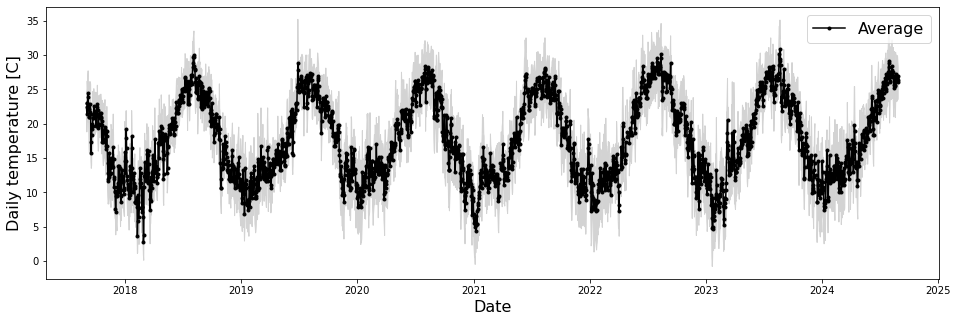

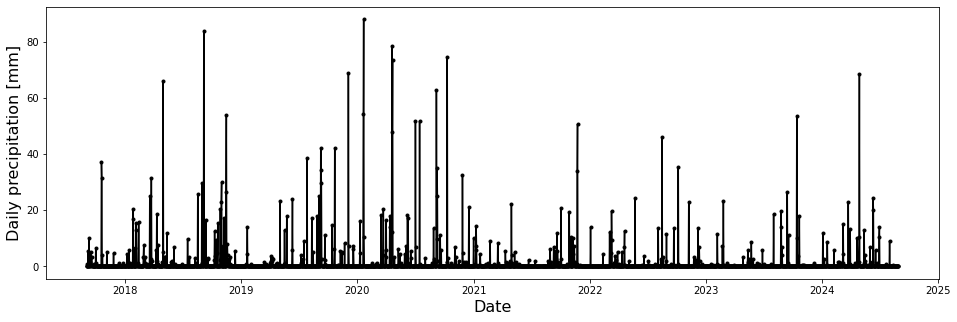

In [55]:
# LEAVE AS-IS

# Retrieve the last 7 years
weather_sample = weather.tail(7*365)

# Plot temperature
plot_min_avg_max(weather_sample)

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Daily precipitation [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary on these two plots. Answer the following: do you observe seasonality in one of these plots? Can you describe what time of seasonality do you observe?</font>

The first graph shows seasonality, we can see that the hotest days are those in the summer months. But for the second graph there is not a clear seasonality.

## 1.1 Smooth the series using moving averages

<font size="+1" color="red">Replace this cell with your implementation of "moving_average"</font>

In [56]:
def moving_average(df, window_size):

    averages = []
    
    for i in range(len(df)):
        
        # Define the window's start and end
        start_idx = max(0, i - window_size + 1) 
        end_idx = i + 1  
        
        # Extract the window from the dataframe
        window = df.iloc[start_idx:end_idx]
        
        # Compute the average
        average = window.mean(numeric_only=True)
        
        # Append the computed average to the list
        averages.append(average)
    
    # Create the dataframe that will be returned
    smoothed = pd.DataFrame(averages, columns=df.columns)
    smoothed.set_index(df.index, inplace=True)  # Preserve the original index
    
    return smoothed

In [57]:
# LEAVE AS-IS

window_size = 7

weather_smoothed = moving_average(weather, window_size)

weather_smoothed.head(10)

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
date,,,,,,,,,,,,,,,
2016-07-01,24.100000,0.000000,21.900000,26.300000,NaN,3.100000,5.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,24.350000,0.000000,22.100000,26.650000,NaN,3.350000,6.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,24.033333,0.000000,22.033333,26.066667,NaN,3.633333,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,23.975000,0.000000,21.975000,26.025000,NaN,3.550000,7.225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,24.240000,0.000000,22.220000,26.300000,NaN,3.460000,7.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-06,24.500000,0.000000,22.366667,26.666667,NaN,3.716667,7.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,24.628571,0.000000,22.557143,26.728571,NaN,3.742857,8.185714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-08,24.928571,0.014286,22.857143,27.028571,NaN,3.657143,8.871429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-09,25.214286,0.014286,23.214286,27.242857,NaN,3.585714,8.757143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


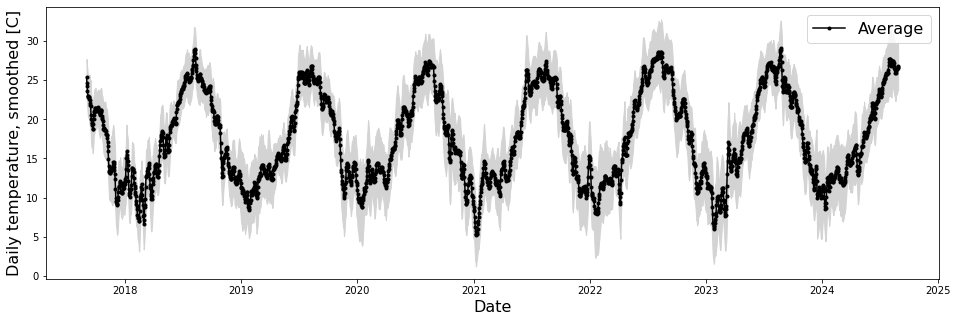

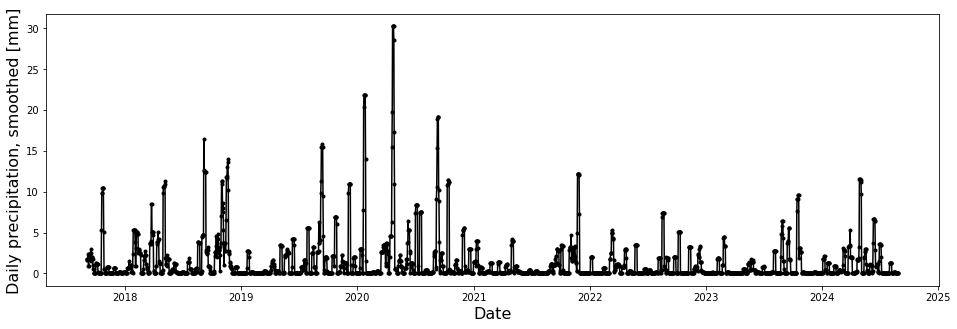

In [58]:
# LEAVE AS-IS

# Sample last 7 years
weather_smoothed_sample = weather_smoothed.tail(7*365)

# Plot smoothed temperature
plot_min_avg_max(weather_smoothed_sample, ylabel='Daily temperature, smoothed [C]')

# Plot smoothed precipitation
plot(weather_smoothed_sample, "rainfall", ylabel="Daily precipitation, smoothed [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary indicating what are the key difficulties when implementing a function for "moving_average"</font>

In the first days the window is smaller, so we have to adjust it.

<font size="+1" color="red">Replace this cell with code that creates a separate ``test`` dataset, and smooths this ``test`` dataset 20 times. **Do not modify your original dataset**, this is just a test. Plot the smoothed daily temperature and smoothed daily precipitation in the ``test`` dataset.</font>

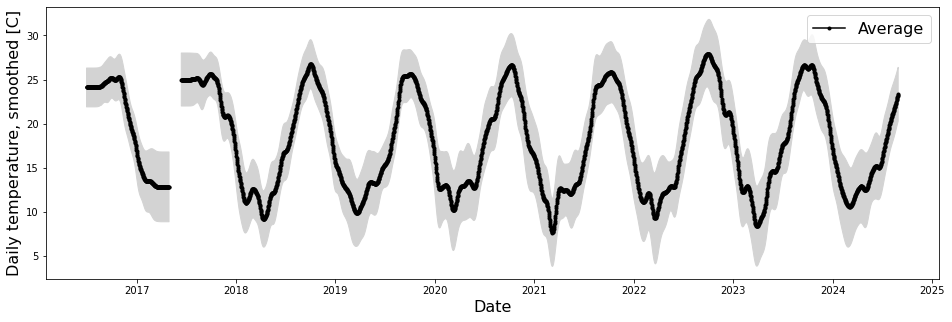

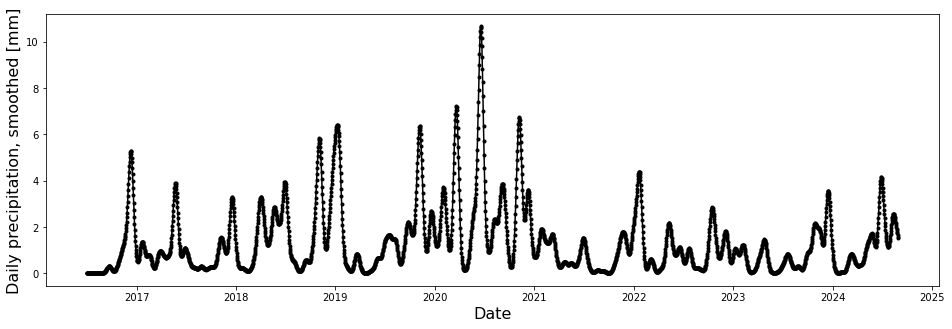

In [59]:
# Crear una copia del dataset original para las pruebas
test = weather.copy()

# Aplicar la media móvil 20 veces
window_size = 7
for _ in range(20):  # Repetir el proceso 20 veces
    test = moving_average(test, window_size)



# Plot smoothed temperature
plot_min_avg_max(test, ylabel='Daily temperature, smoothed [C]')

# Plot smoothed precipitation
plot(test, "rainfall", ylabel="Daily precipitation, smoothed [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary on what you see in the repeatedly smoothed dataset. Why does this happen?</font>

In the smoothed plots, we can see a clear seasonal cycle with reduced daily fluctuations. Precipitation variability decreases, but sharp peaks remain visible, though less pronounced and more spread out.

## 1.2. Smooth the series by binning per floating weeks

<font size="+1" color="red">Replace this cell with your code for "list_of_floating_week_starts"</font>

In [60]:
def list_of_floating_week_starts(first, last):
    weeks = []

    # La primera semana comienza con el primer día del periodo
    current_start = first - datetime.timedelta(days=first.weekday())  # Primer día de la semana (lunes)

    while current_start <= last:
        weeks.append(current_start)
        current_start += datetime.timedelta(weeks=1)  # Sumamos 7 días para la siguiente semana
    
    # Añadimos la última
    weeks.append(current_start)

    return weeks

In [61]:
# LEAVE AS-IS

# Remember that our data frame is indexedb by date
first_day = np.min(weather.index)
last_day = np.max(weather.index)

# Obtain the list of weeks
weeks = list_of_floating_week_starts(first_day, last_day)

# Print the list of weeks
print("There are %d week starts" % len(weeks))
print("First week starts %s, last week starts %s" %
      (weeks[0].strftime("%Y-%m-%d"), weeks[-1].strftime("%Y-%m-%d")))

There are 428 week starts
First week starts 2016-06-27, last week starts 2024-09-02


In [62]:
# LEAVE AS-IS

# Create a map from dates to week starts
date_to_week_start= {}
week_num = 0
for date, row in weather.iterrows():
    while not (date >= weeks[week_num] and date < weeks[week_num+1]):
        week_num += 1
    date_to_week_start[date] = weeks[week_num]
    
# Create a new dataframe with an extra column
weather_with_week_start = weather
weather_with_week_start['week_start'] = [date_to_week_start[date] for date in weather.index]
weather_with_week_start.head(10)

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,week_start
date,,,,,,,,,,,,,,,,
2016-07-01,24.1,0.0,21.9,26.3,NaN,3.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-27
2016-07-02,24.6,0.0,22.3,27.0,NaN,3.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-27
2016-07-03,23.4,0.0,21.9,24.9,NaN,4.2,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-27
2016-07-04,23.8,0.0,21.8,25.9,NaN,3.3,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
2016-07-05,25.3,0.0,23.2,27.4,NaN,3.1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
2016-07-06,25.8,0.0,23.1,28.5,NaN,5.0,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
2016-07-07,25.4,0.0,23.7,27.1,NaN,3.9,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
2016-07-08,26.2,0.1,24.0,28.4,NaN,2.5,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04
2016-07-09,26.6,0.0,24.8,28.5,NaN,3.1,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04


<font size="+1" color="red">Replace this cell with your code to generate the "weather_per_floating_week" dataframe</font>

In [63]:
# Agrupar por la columna 'week_start' 
weather_per_floating_week = weather.groupby('week_start').agg({
    'temp_min': np.mean,   
    'temp_avg': np.mean,   
    'temp_max': np.mean,   
    'rainfall': np.sum    
}).reset_index()


weather_per_floating_week.head()

,week_start,temp_min,temp_avg,temp_max,rainfall
0,2016-06-27,22.033333,24.033333,26.066667,0.0
1,2016-07-04,23.642857,25.700000,27.771429,0.1
2,2016-07-11,21.414286,23.914286,26.428571,0.3
3,2016-07-18,21.757143,24.685714,27.628571,6.4
4,2016-07-25,23.800000,26.100000,28.400000,0.6


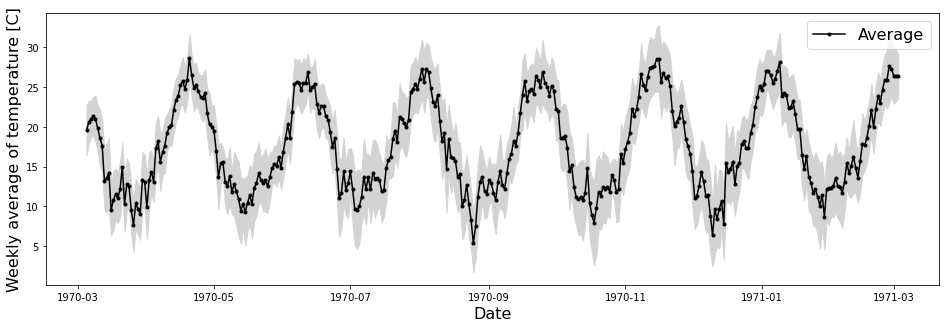

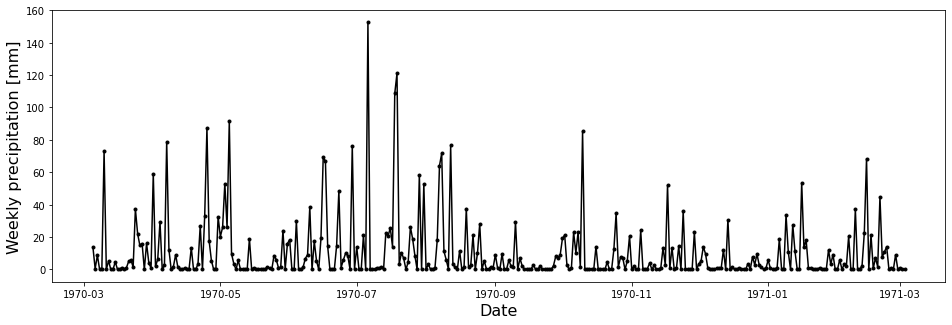

In [64]:
# LEAVE AS-IS

# Retrieve the past 5 years
weather_sample = weather_per_floating_week.tail(7*52)

# Plot temperature
plot_min_avg_max(weather_sample, ylabel="Weekly average of temperature [C]")

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Weekly precipitation [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary of what you observe on these plots.</font>

The first graph is still seasonal and have the same shape that the day by day. The second one its very similar to the day by day graph but it is more clear to see the weeks when it rained more.

## 1.3. Smooth the series by binning per month

In [65]:
def list_of_month_starts(first, last):
    months = []

    current = first.replace(day=1)

    while current <= last:
        months.append(current)
        
        if current.month < 12:
            current = current.replace(month=current.month + 1)
        else:
            current = current.replace(year=current.year + 1, month=1)

    months.append(current)
    
    return months

In [66]:
# LEAVE AS-IS

first_day = np.min(weather.index)
last_day = np.max(weather.index)
months = list_of_month_starts(first_day, last_day)

print("There are %d month starts" % len(months))
print("First month starts %s, last month starts %s" % (months[0].strftime("%Y-%m-%d"), months[-1].strftime("%Y-%m-%d")))

There are 99 month starts
First month starts 2016-07-01, last month starts 2024-09-01


In [67]:
# LEAVE AS-IS

# Create a map from dates to week starts
date_to_month_start= {}
month_num = 0
for date, row in weather.iterrows():
    while not (date >= months[month_num] and date < months[month_num+1]):
        month_num += 1
    date_to_month_start[date] = months[month_num]
    
# Create a new dataframe with an extra column
weather_with_month_start = weather
weather_with_month_start['month_start'] = [date_to_month_start[date] for date in weather.index]
weather_with_month_start

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,week_start,month_start
date,,,,,,,,,,,,,,,,,
2016-07-01,24.1,0.0,21.9,26.3,NaN,3.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-27,2016-07-01
2016-07-02,24.6,0.0,22.3,27.0,NaN,3.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-27,2016-07-01
2016-07-03,23.4,0.0,21.9,24.9,NaN,4.2,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-27,2016-07-01
2016-07-04,23.8,0.0,21.8,25.9,NaN,3.3,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04,2016-07-01
2016-07-05,25.3,0.0,23.2,27.4,NaN,3.1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-25,26.6,0.0,23.9,29.3,NaN,4.2,12.5,8.8,1017.7,1015.4,55.0,82.0,Varias,46.0,14:13,2024-08-19,2024-08-01
2024-08-26,26.5,0.0,23.3,29.7,NaN,5.0,10.3,8.1,1017.4,1014.8,63.0,78.0,Varias,52.0,11:36,2024-08-26,2024-08-01
2024-08-27,26.9,0.0,23.9,29.9,NaN,4.4,11.7,10.3,1015.9,1012.6,69.0,81.0,Varias,58.0,14:39,2024-08-26,2024-08-01


<font size="+1" color="red">Replace this cell with your code to generate the "weather_per_month" dataframe</font>

In [68]:
weather_per_month = weather_with_month_start.groupby('month_start').agg({
    'temp_min': np.mean,   # Promedio de la temperatura mínima
    'temp_avg': np.mean,   # Promedio de la temperatura media
    'temp_max': np.mean,   # Promedio de la temperatura máxima
    'rainfall': np.sum     # Suma de la precipitación
}).reset_index()

weather_per_month.head()

,month_start,temp_min,temp_avg,temp_max,rainfall
0,2016-07-01,22.593548,24.996774,27.412903,7.4
1,2016-08-01,22.633333,24.974074,27.318519,8.1
2,2016-09-01,20.758621,23.703448,26.655172,31.6
3,2016-10-01,16.903448,19.365517,21.837931,126.7
4,2016-11-01,11.937931,15.027586,18.100000,31.8


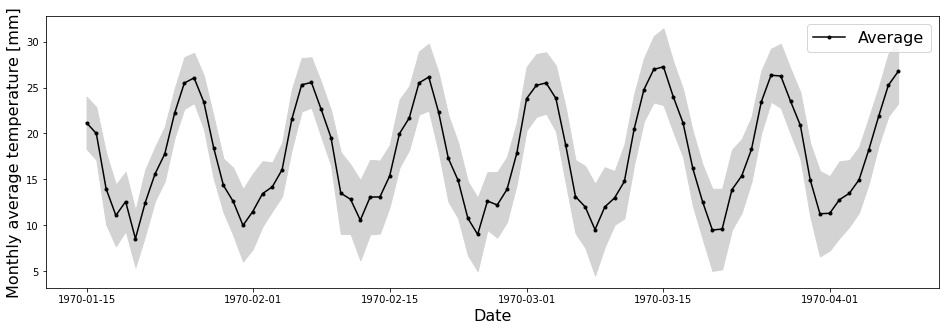

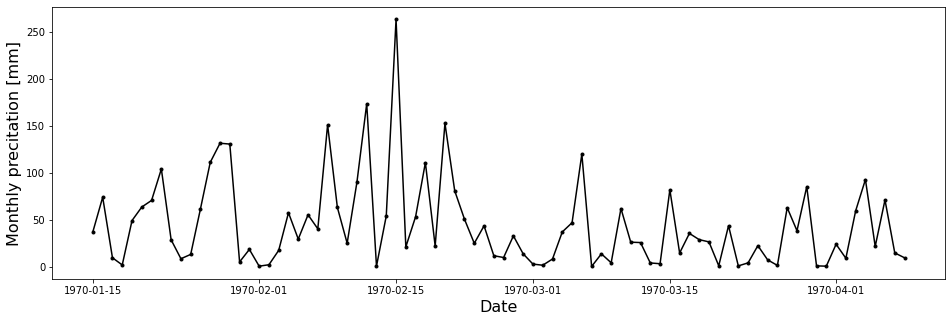

In [69]:
# LEAVE AS-IS

# Retrieve the last 7 years
weather_sample = weather_per_month.tail(7*12)

# Plot temperature
plot_min_avg_max(weather_sample, ylabel="Monthly average temperature [mm]")

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Monthly precitation [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary of what you observe on these plots.</font>

Now the difference between these plots and the original is more obvious. We have more clear shapes and it is esaier to see where are the peak values.

# 2. Perform forecasting

## 2.1. Compute auto-correlation plots

<font size="+1" color="red">Replace this cell with your code for "lagged_series"</font>

In [70]:
def lagged_series(series, lag):
    
    original_trimmed = []
    lagged = []
    
    for i in range(len(series)):
        j = i - lag  # Index 
        if 0 <= j < len(series):  
            original_trimmed.append(series[i])
            lagged.append(series[j])
    
    return original_trimmed, lagged

In [71]:
# LEAVE AS-IS

assert ([44, 55, 66, 77, 88], [11, 22, 33, 44, 55]) == lagged_series([11,22,33,44,55,66,77,88], 3)

assert ([33, 44, 55, 66, 77, 88], [11, 22, 33, 44, 55, 66]) == lagged_series([11,22,33,44,55,66,77,88], 2)

assert ([22, 33, 44, 55, 66, 77, 88], [11, 22, 33, 44, 55, 66, 77]) == lagged_series([11,22,33,44,55,66,77,88], 1)


In [72]:
# LEAVE AS-IS

# Computes the correlation between two vectors, considering
# only the positions in which both vectors are not NaN
def correlation_without_nan(x,y):
    positions_to_remove = ~np.logical_or(np.isnan(x), np.isnan(y))

    x_without_nan = np.compress(positions_to_remove, x)
    y_without_nan = np.compress(positions_to_remove, y)
    return stats.pearsonr(x_without_nan,y_without_nan)[0]  

# Compute autocorrelation
def autocorrelation(series, lag):
    x,y = lagged_series(series, lag)
            
    return correlation_without_nan(x,y)

<font size="+1" color="red">Replace this cell with your code to compute "auto_correlations_temp" and "auto_correlations_rainfall"</font>

In [73]:
def compute_autocorrelations(series, max_periods):
    autocorrelations = []  # List to store autocorrelation values
    for lag in range(max_periods):  # Iterate through each lag
        corr = autocorrelation(series, lag)  # Compute autocorrelation for the current lag
        autocorrelations.append(corr)  # Store the result
    return autocorrelations

In [74]:
max_periods = 2 * 365  

auto_correlations_temp = compute_autocorrelations(weather['temp_avg'], max_periods)
auto_correlations_temp_max = compute_autocorrelations(weather['temp_max'], max_periods)
auto_correlations_rainfall = compute_autocorrelations(weather['rainfall'], max_periods)



In [75]:
# LEAVE AS-IS

def plot_auto_correlations(correlations, xlabel="Lag (days)", ylabel="Autocorrelation"):
    # Figure
    plt.figure(figsize=(15,4))

    # Plot correlation
    plt.plot(range(len(correlations)), correlations, '-o')

    # Add xticks every 10 periods
    plt.xticks(np.arange(0, len(correlations), 10), rotation=90)

    # Add a horizontal line at zero
    plt.hlines(0, xmin=0, xmax=len(correlations))

    # Add labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

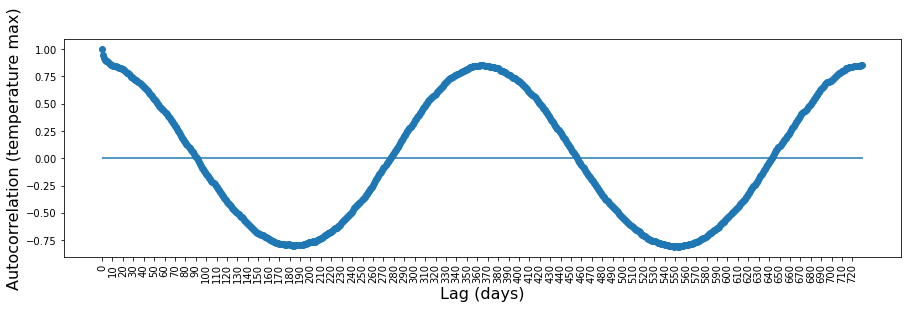

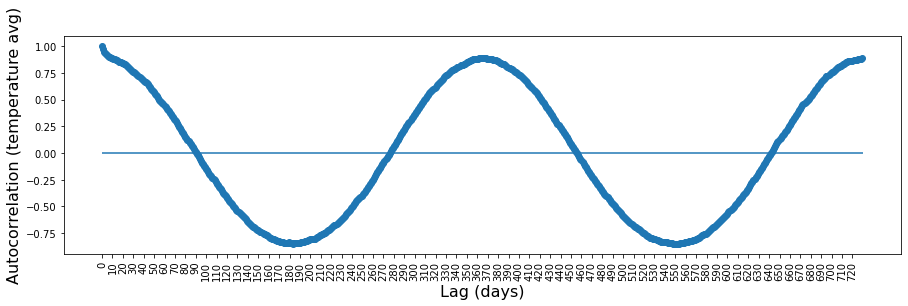

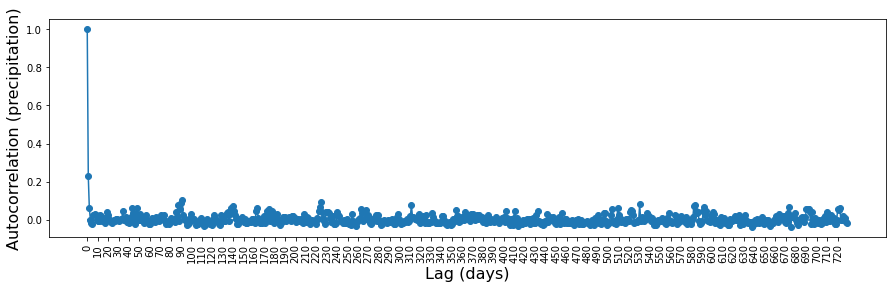

In [76]:
# LEAVE AS-IS

# Plot max temperature auto-correlation
plot_auto_correlations(auto_correlations_temp_max, ylabel="Autocorrelation (temperature max)")

# Plot avg temperature auto-correlation
plot_auto_correlations(auto_correlations_temp, ylabel="Autocorrelation (temperature avg)")

# Plot precipitation auto-correlation
plot_auto_correlations(auto_correlations_rainfall, ylabel="Autocorrelation (precipitation)")

<font size="+1" color="red">Replace this cell with a brief commentary on what you see on these plots. What do these autocorrelations indicate about the temperature data? What do these autocorrelations indicate about the precipitation data?</font>

In the temperature plots, we can see a strong annual periodicity. Precipitation does not show a strong periodicity, so is much less predictable.

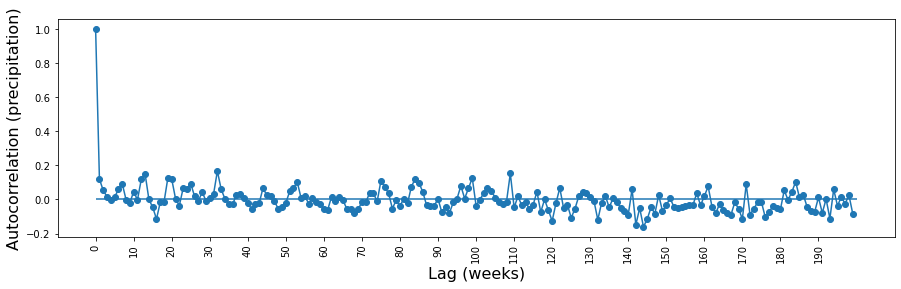

In [77]:
# LEAVE AS-IS

auto_correlations_rainfall_week = compute_autocorrelations(weather_per_floating_week['rainfall'], 200)

plot_auto_correlations(auto_correlations_rainfall_week, xlabel='Lag (weeks)', ylabel="Autocorrelation (precipitation)")

<font size="+1" color="red">Replace this cell with a brief commentary on what you see on this plot. Do you think the correlations you observe in the weekly time series of precipitation (aside from the one at lag=1) come from a real phenomenon, or are spurious? Why?</font>

## 2.2. Prepare a system of equations to learn an auto-regressive model

<font size="+1" color="red">Replace this cell with your code for "prepare_matrices"</font>

In [78]:
def prepare_matrices(series, lags):
    y = []
    X = []

    # Validate lags
    for lag in lags:
        assert(lag > 0)
        assert(lag < len(series))

    # Prepare the X matrix and y vector
    for i in range(np.max(lags), len(series)):
        row = []
        # Collect the values for each lag
        for lag in lags:
            row.append(series[i - lag])
        
        # Check if any value in the row or y is NaN
        if not any(np.isnan(row)) and not np.isnan(series[i]):
            X.append(row)
            y.append(series[i])

    return np.array(X), np.array(y)

In [79]:
# LEAVE AS-IS

X, y = prepare_matrices([11, 15, 32, 37, 52, 54, 70, 89], [2, 3])
print("X=%s" % X)
print("y=%s" % y)

X=[[15 11]
 [32 15]
 [37 32]
 [52 37]
 [54 52]]
y=[37 52 54 70 89]


In [80]:
# LEAVE AS-IS

X, y = prepare_matrices([11, 15, 32, np.nan, 52, 54, 70, 89], [2, 3])
print("X=%s" % X)
print("y=%s" % y)

X=[[32 15]
 [54 52]]
y=[52 89]


## 2.3. Perform forecasts

In [81]:
# LEAVE AS-IS

def perform_forecast(series, lags):

    # Prepare matrices for linear regression
    X, y = prepare_matrices(series, lags)

    # Perform forecast
    linear_regressor = LinearRegression()
    linear_regressor.fit(X,y)
    y_pred = linear_regressor.predict(X)

    # Compute forecasting error
    # Root mean squared error, normalized
    rmse = math.sqrt(mean_squared_error(y, y_pred))/(np.max(y)-np.min(y))
    
    # Return: observed, predicted, error
    return (y, y_pred, rmse)

def plot_forecast(y, y_pred, xlabel="Period", ylabel="", nrmsd=-1):

    plt.figure(figsize=(15,4))
    
    plt.plot(y, '.-', linewidth=4, color='gray', label='Observed')
    plt.plot(y_pred, '--', linewidth=2, color='green', label=('Model (NRMSD=%.2f)' % nrmsd if nrmsd > 0 else 'Model'))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()
    plt.show()

<font size="+1" color="red">Replace this cell with your choice for "lags_monthly_temperature"</font>

In [82]:
lags_monthly_temperature = [1, 2, 3, 12]

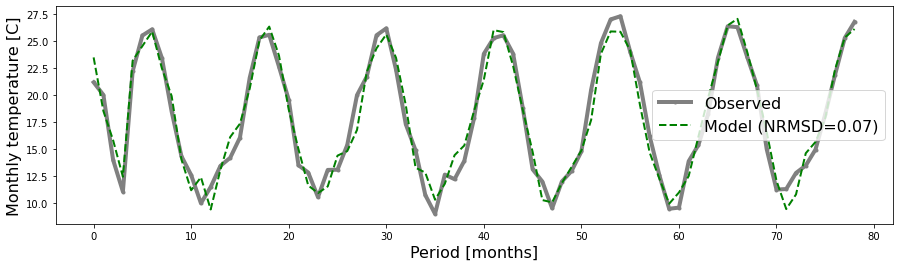

In [83]:
# LEAVE AS-IS

(y, y_pred, nrmsd) = perform_forecast(weather_per_month['temp_avg'],
                                      lags_monthly_temperature)

plot_forecast(y, y_pred,
              xlabel="Period [months]",
              ylabel="Monthly temperature [C]",
              nrmsd=nrmsd)

<font size="+1" color="red">Replace this cell with code and plots predicting: (1) weekly temperature, (2) daily temperature. Always use up to 4 lags, and try to find the lags leading to the smaller error.</font>

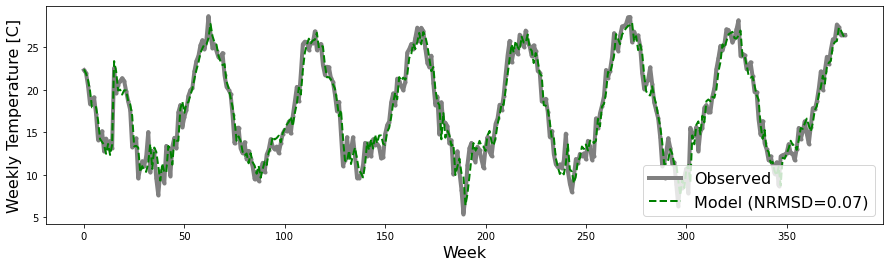

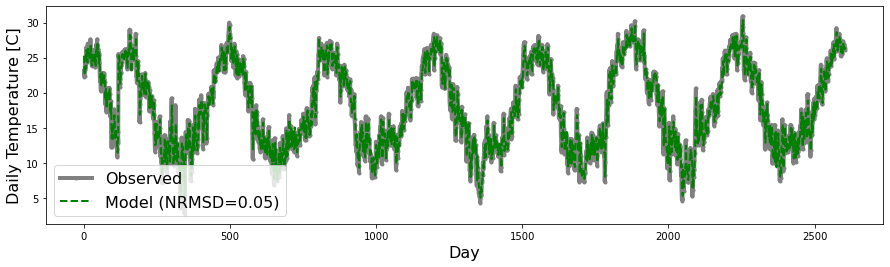

In [84]:
# Weekly temperature


# Perform the forecast
weekly_y, weekly_y_pred, weekly_rmse = perform_forecast(weather['temp_avg'].resample('W').mean(), lags_monthly_temperature)

weekly_nrmsd = weekly_rmse

# Plot the results for weekly temperature
plot_forecast(weekly_y, weekly_y_pred, xlabel="Week", ylabel="Weekly Temperature [C]", nrmsd=weekly_nrmsd)



# Daily temperature prediction

# Perform the forecast
daily_y, daily_y_pred, daily_rmse = perform_forecast(weather['temp_avg'], lags_monthly_temperature)

daily_nrmsd = daily_rmse

# Plot the results for daily temperature
plot_forecast(daily_y, daily_y_pred, xlabel="Day", ylabel="Daily Temperature [C]", nrmsd=daily_nrmsd)

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe when predicting temperature.</font>

<font size="+1" color="red">Replace this cell with code and plots predicting: (1) monthly rainfall, (2) weekly rainfall, (3) daily rainfall.  Always use up to 4 lags, and try to find the lags leading to the smaller error.</font>

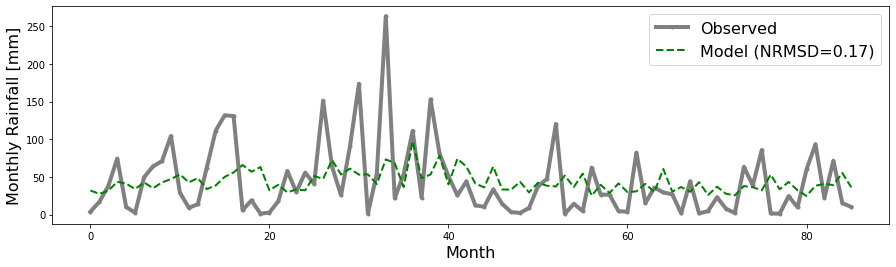

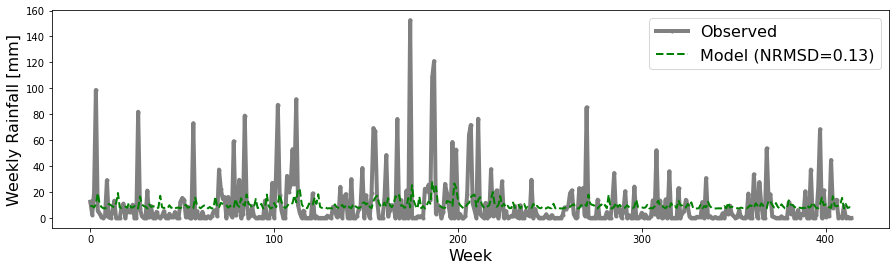

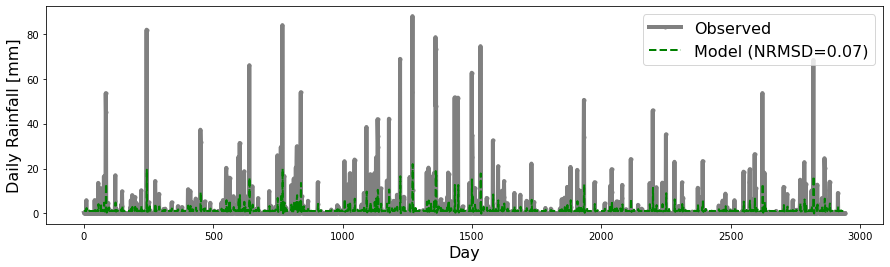

In [85]:
# 1 Monthly rainfall Prediction
# Resample the data to monthly sums
monthly_rainfall = weather['rainfall'].resample('M').sum()



# Perform forecast for monthly rainfall using the best lags
monthly_y, monthly_y_pred, monthly_rmse = perform_forecast(monthly_rainfall, lags_monthly_temperature)

# Plot the forecast for Monthly Rainfall
plot_forecast(monthly_y, monthly_y_pred, xlabel="Month", ylabel="Monthly Rainfall [mm]", nrmsd=monthly_rmse)

# 2 Weekly rainfall prediction
# Resample the data to weekly sums
weekly_rainfall = weather['rainfall'].resample('W').sum()


# Perform forecast for weekly rainfall using the best lags
weekly_y, weekly_y_pred, weekly_rmse = perform_forecast(weekly_rainfall, lags_monthly_temperature)

# Plot the forecast for Weekly Rainfall
plot_forecast(weekly_y, weekly_y_pred, xlabel="Week", ylabel="Weekly Rainfall [mm]", nrmsd=weekly_rmse)

# 3 Daily rainfall 


# Perform forecast for daily rainfall using the best lags
daily_y, daily_y_pred, daily_rmse = perform_forecast(weather['rainfall'], lags_monthly_temperature)

# Plot the forecast for Daily Rainfall
plot_forecast(daily_y, daily_y_pred, xlabel="Day", ylabel="Daily Rainfall [mm]", nrmsd=daily_rmse)

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe when trying to predict rainfall.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>